In [1]:
import numpy as np
import pandas as pd

In [2]:
def gradient_descent(x, y_true, epochs, learning_rate=0.01):
#     each feature should have its own weight, the total number of features are x.shape[1]
    w = np.ones(shape=(x.shape[1]))
    b = 0
    total_samples = x.shape[0]
    cost_list= []
    epoch_list = []
    
    for i in range(epochs):
        y_predictions = np.dot(w, x.T) + b
    
        w_derivatives = -(2/total_samples)*(x.T.dot(y_true - y_predictions))
        b_derivatives = -(2/total_samples)*np.sum(y_true - y_predictions)
    
        w = w - learning_rate*w_derivatives
        b = b - learning_rate*b_derivatives
    
        cost = np.mean(np.square(y_true - y_predictions))
    
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
        
    return w, b, cost_list, epoch_list

In [3]:
df = pd.read_csv('../../../datasets/houseprediction.csv')
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


In [4]:
from sklearn import preprocessing

In [5]:
sy = preprocessing.MinMaxScaler()
sx = preprocessing.MinMaxScaler()

In [6]:
scale_y = sy.fit_transform(df[['price']])
scale_x = sx.fit_transform(df[['area', 'bedrooms']])

In [7]:
scale_x.T

array([[0.08827586, 0.62068966, 0.22068966, 0.24862069, 0.13793103,
        0.12758621, 0.6662069 , 0.86206897, 0.17586207, 1.        ,
        0.34482759, 0.68448276, 0.06896552, 0.10344828, 0.5       ,
        0.12931034, 0.13103448, 0.25517241, 0.67931034, 0.        ],
       [0.25      , 0.75      , 0.5       , 0.5       , 0.25      ,
        0.25      , 0.75      , 0.75      , 0.5       , 1.        ,
        0.5       , 0.75      , 0.25      , 0.25      , 0.5       ,
        0.25      , 0.5       , 0.5       , 0.5       , 0.        ]])

In [8]:
w, b, cost_list, epoch_list = gradient_descent(scale_x, scale_y.reshape(scale_y.shape[0], ), 9000)

In [9]:
w, b

(array([0.82833261, 0.32270929]), -0.09815571636523694)

In [10]:
from matplotlib import pyplot as plt

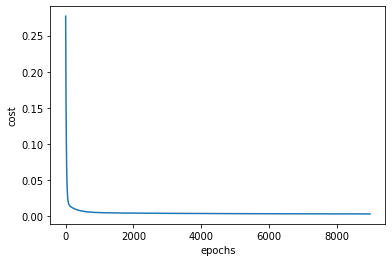

In [11]:
plt.ylabel("cost")
plt.xlabel("epochs")
plt.plot(epoch_list, cost_list)
plt.show()

In [12]:
def prediction(area, bedrooms, w, b):
    scale_x = sx.transform([[area, bedrooms]])[0]
    prediction = np.dot(w, scale_x.T) + b
    return sy.inverse_transform([[prediction]])

In [13]:
prediction(2600, 4, w, b)[0][0]

120.83185369303987